In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing lead dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Inspection

In [3]:
lead_data.shape

(9240, 37)

In [4]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning

In [ ]:
lead_data = lead_data.replace('Select', np.nan)

In [7]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Finding the null percentages across columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [9]:
# dropping the columns with missing values greater than or equal to 40% .
lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [10]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

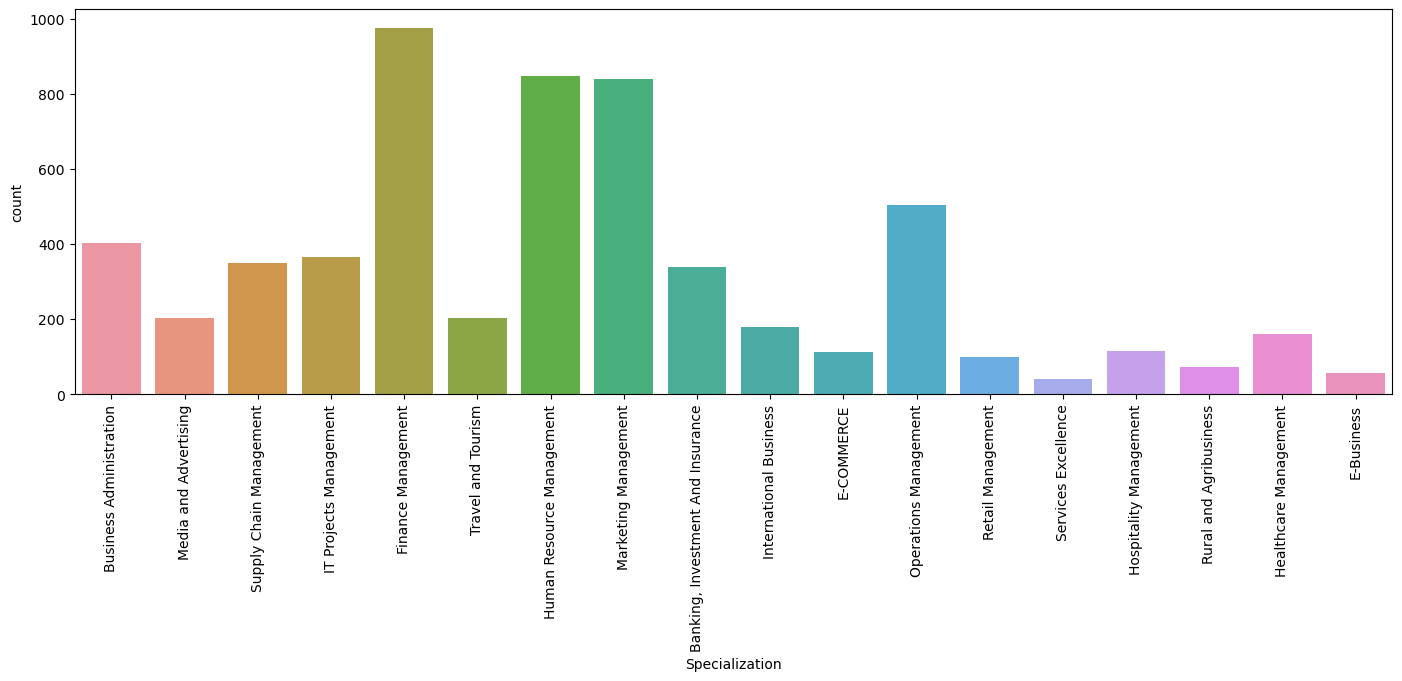

In [11]:
plt.figure(figsize=(17,5))
sns.countplot(lead_data['Specialization'])
plt.xticks(rotation=90)

In [12]:
# Creating a separate category called 'Others' for this 
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

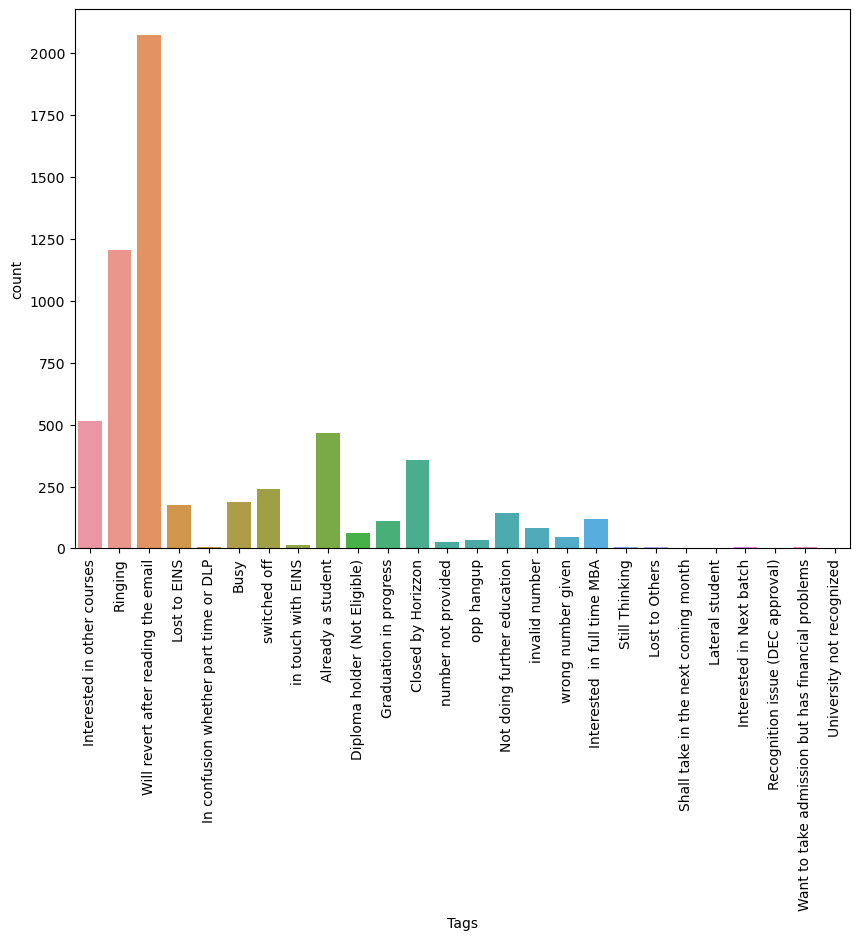

In [13]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(lead_data['Tags'])
plt.xticks(rotation=90)

In [14]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

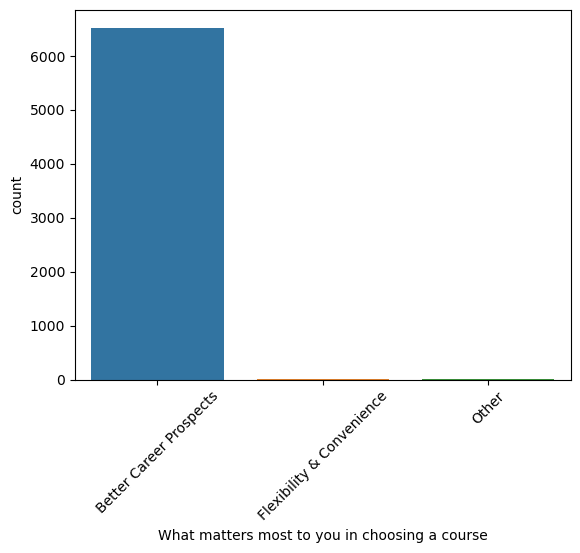

In [15]:
# Visualizing this column
sns.countplot(lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation=45)

In [16]:
# Finding the percentage of the different categories of this column:
round(lead_data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [17]:
# Dropping this column 
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

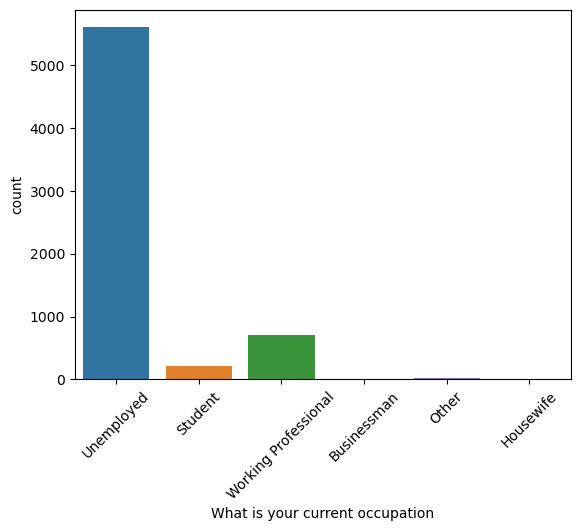

In [18]:
sns.countplot(lead_data['What is your current occupation'])
plt.xticks(rotation=45)

In [19]:
# Finding the percentage of the different categories of this column:
round(lead_data['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [20]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

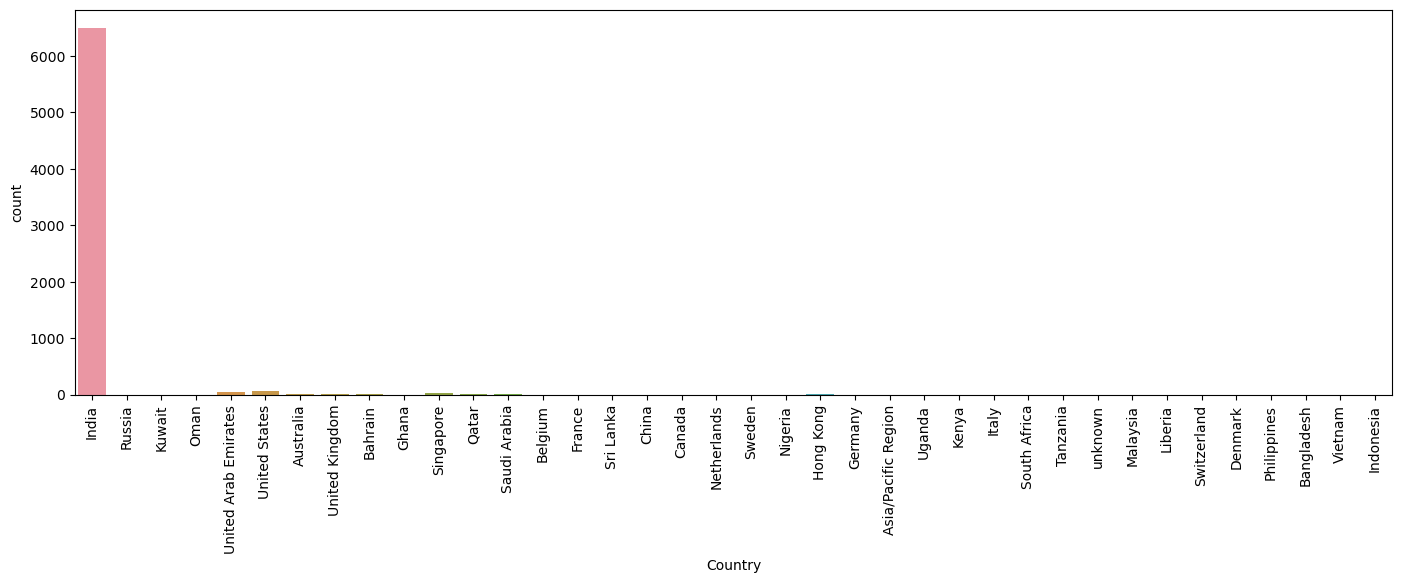

In [21]:
plt.figure(figsize=(17,5))
sns.countplot(lead_data['Country'])
plt.xticks(rotation=90)

In [22]:
# Inputing the missing data in the 'Country' column with 'India'
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

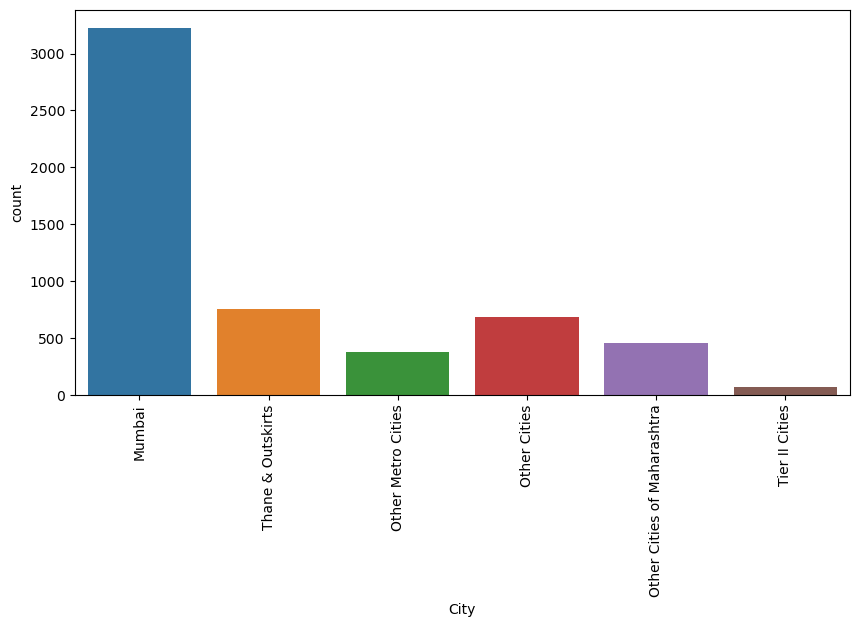

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(lead_data['City'])
plt.xticks(rotation=90)

In [24]:
# Finding the percentage of the different categories of this column:
round(lead_data['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [25]:
# Inputing the missing data in the 'City' column with 'Mumbai'
lead_data['City']=lead_data['City'].replace(np.nan,'Mumbai')

In [26]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [27]:
# Dropping the rows with null values
lead_data.dropna(inplace = True)

In [28]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [29]:
# Percentage of rows retained 
(len(lead_data.index)/9240)*100

98.2034632034632

# Exploratory Data Anaysis

In [30]:
lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


# Univariate and Bivariate

In [33]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

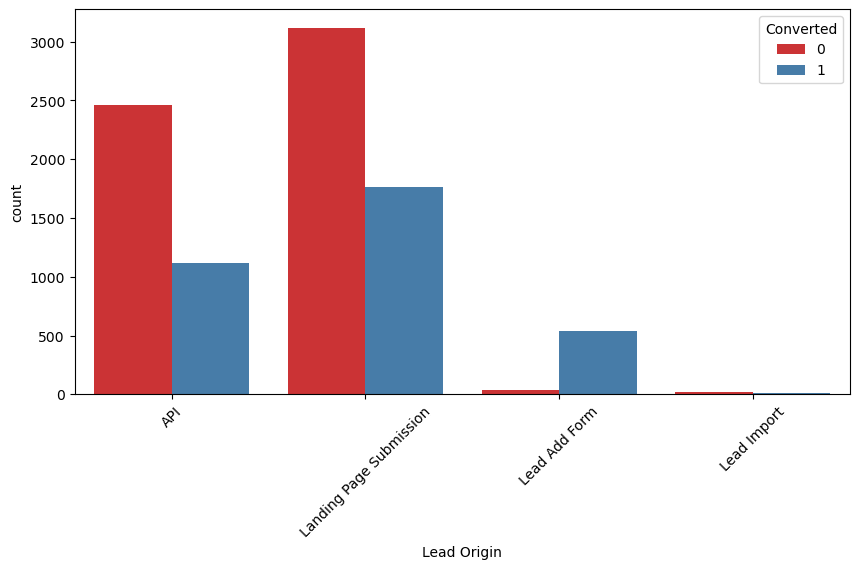

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

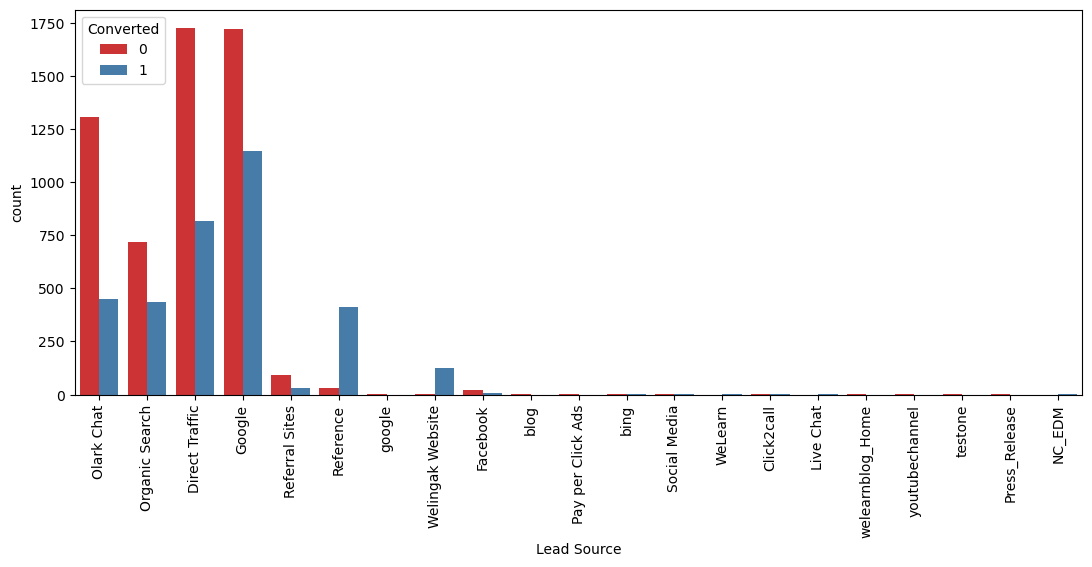

In [35]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette='Set1')
plt.xticks(rotation = 90)

In [36]:
# Need to replace 'google' with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [37]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

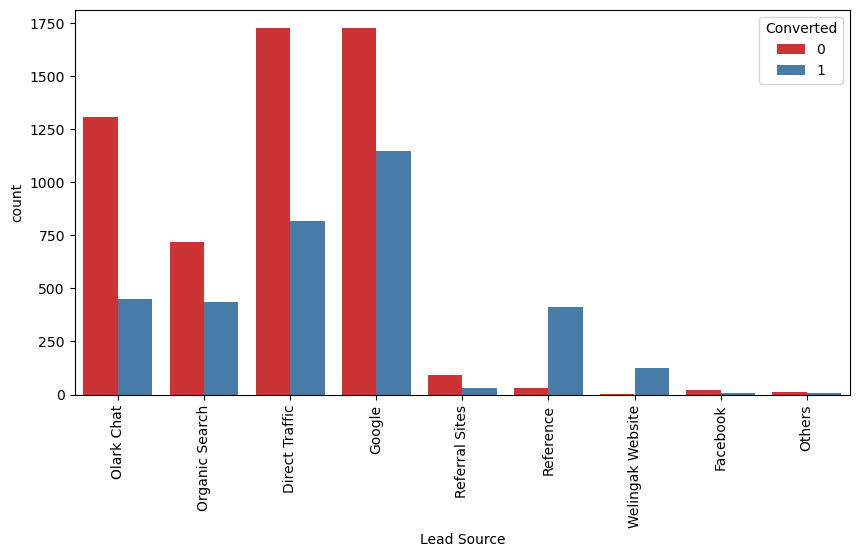

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

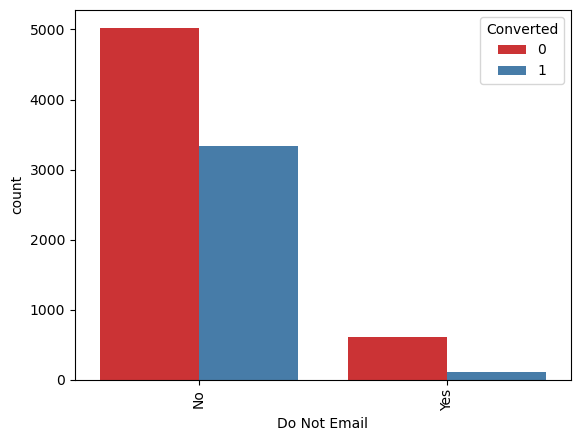

In [39]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

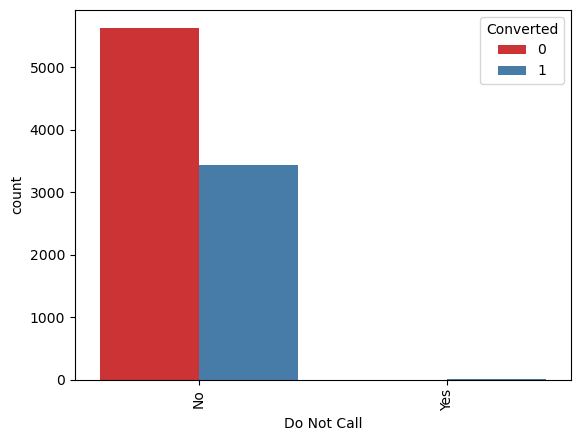

In [40]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [41]:
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

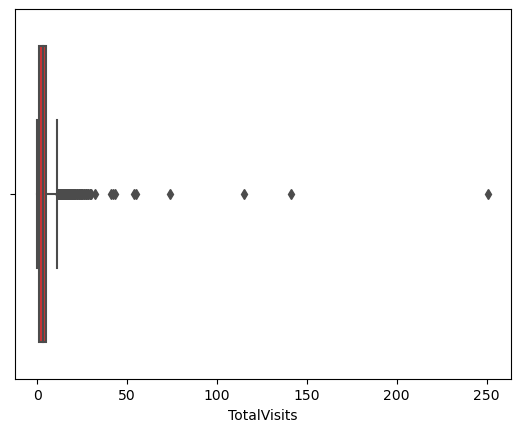

In [42]:
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')

In [43]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

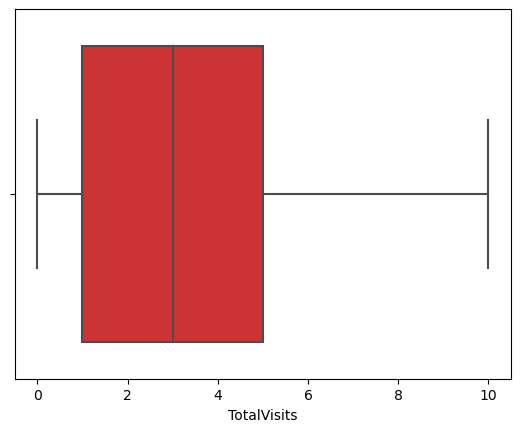

In [44]:
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

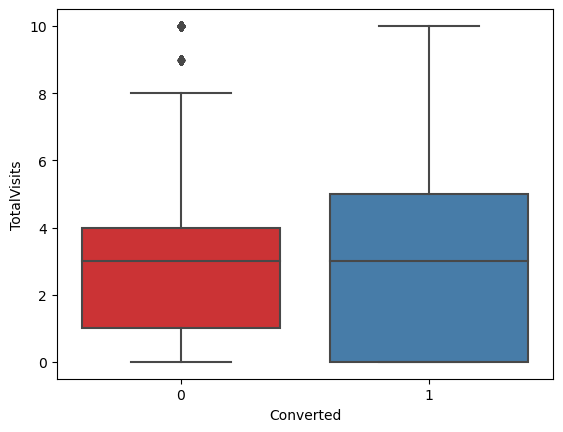

In [45]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data,palette='Set1')

In [46]:
lead_data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

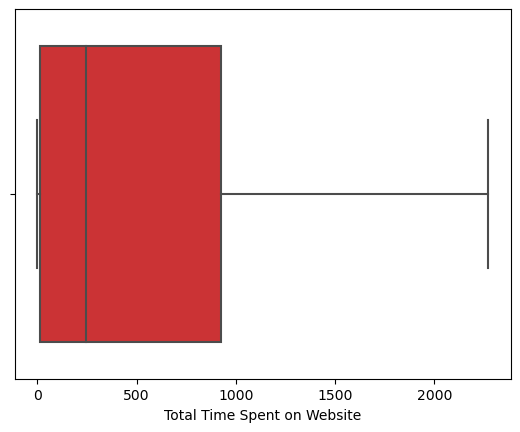

In [47]:
sns.boxplot(lead_data['Total Time Spent on Website'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

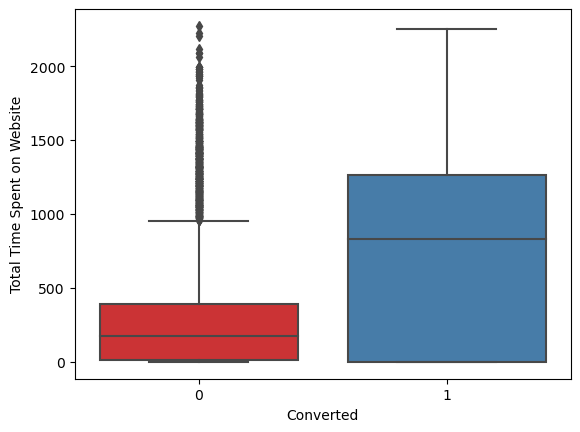

In [48]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data,palette='Set1')

In [49]:
lead_data = lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [50]:
lead_data.shape

(9074, 14)

In [51]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

# Data Preparation

In [52]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

In [53]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [55]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [56]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## Splitting the data into train and test set

In [58]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [59]:
# Putting target variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Scaling the Features

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.058552,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [65]:
# Checking the Lead Conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

## Feature Selection Using RFE

In [67]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=20)             
rfe = rfe.fit(X_train, y_train)

In [68]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [69]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 2),
 ('Last Activity_Email Marked Spam', False, 2),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Email Received', False, 3),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Ac

In [70]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Ci

# Model Building

In [71]:
import statsmodels.api as sm

In [72]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.1
Date:                Wed, 16 Aug 2023   Deviance:                       5134.2
Time:                        00:08:35   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4082
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9235      1.287      1.495      0.135      -0.598       4.445
Do Not Email                                            -1.6083      0.221     -7.290      0.000      -2.041      -1.176
Do Not Call                                             21.6338    3.3e+04      0.001      0.999   -6.47e+04    6.47e+04
Total Time Spent on Website                              1.1104      0.041     27.002      0.000       1.030       1.191
Lead Origin_Landing Page Submission                     -1.1020      0.131     -8.444      0.000      -1.358      -0.846
Lead Origin_Lead Add Form                                1.4906      0.894      1.667      0.095      -0.262       3.243
Lead Origin_Lead Import                                  0.9167      0.476      1.924      0.054      -0.017       1.851
Lead Source_Olark Chat                                   1.1075      0.125      8.874      0.000       0.863       1.352
Lead Source_Reference                                    1.8332      0.918      1.997      0.046       0.034       3.632
Lead Source_Welingak Website                             4.3944      1.150      3.821      0.000       2.140       6.649
Last Activity_Converted to Lead                         -0.9783      0.245     -3.989      0.000      -1.459      -0.498
Last Activity_Email Bounced                             -1.1465      0.645     -1.776      0.076      -2.411       0.118
Last Activity_Form Submitted on Website                 -0.5600      0.355     -1.578      0.115      -1.256       0.136
Last Activity_Had a Phone Conversation                   1.8998      1.156      1.643      0.100      -0.366       4.166
Last Activity_Olark Chat Conversation                   -1.2851      0.214     -5.996      0.000      -1.705      -0.865
Last Activity_Page Visited on Website                   -0.3145      0.234     -1.346      0.178      -0.772       0.143
Last Activity_Resubscribed to emails                    11.3036   2.41e+04      0.000      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   0.4509      0.176      2.555      0.011       0.105       0.797
Last Activity_Unsubscribed                               0.7021      1.126      0.624      0.533      -1.505       2.909
Last Activity_View in browser link Clicked              -0.8728      1.196     -0.730      0.465      -3.217       1.471
Specialization_Hospitality Management                   -0.4188      0.330     -1.271      0.204      -1.065       0.227
Specialization_Others                                   -1.1272      0.127     -8.858      0.000      -1.377      -0.878
What is your current occupation_Housewife               21

In [73]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

## Modal 2

In [74]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.1
Date:                Wed, 16 Aug 2023   Deviance:                       5138.3
Time:                        00:10:36   Pearson chi2:                 6.44e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4078
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.4189      1.264      1.914      0.056      -0.059       4.896
Do Not Email                                            -1.6128      0.221     -7.303      0.000      -2.046      -1.180
Do Not Call                                             20.6373      2e+04      0.001      0.999   -3.93e+04    3.93e+04
Total Time Spent on Website                              1.1093      0.041     26.994      0.000       1.029       1.190
Lead Origin_Landing Page Submission                     -1.0953      0.130     -8.401      0.000      -1.351      -0.840
Lead Origin_Lead Add Form                                1.4938      0.894      1.671      0.095      -0.258       3.246
Lead Origin_Lead Import                                  0.9181      0.476      1.927      0.054      -0.016       1.852
Lead Source_Olark Chat                                   1.1078      0.125      8.876      0.000       0.863       1.352
Lead Source_Reference                                    1.8358      0.918      2.000      0.045       0.037       3.634
Lead Source_Welingak Website                             4.3922      1.150      3.819      0.000       2.138       6.646
Last Activity_Converted to Lead                         -0.9779      0.245     -3.988      0.000      -1.459      -0.497
Last Activity_Email Bounced                             -1.1424      0.645     -1.770      0.077      -2.407       0.122
Last Activity_Form Submitted on Website                 -0.5666      0.354     -1.599      0.110      -1.261       0.128
Last Activity_Had a Phone Conversation                   1.9015      1.156      1.645      0.100      -0.364       4.167
Last Activity_Olark Chat Conversation                   -1.2871      0.215     -5.999      0.000      -1.708      -0.867
Last Activity_Page Visited on Website                   -0.3265      0.234     -1.396      0.163      -0.785       0.132
Last Activity_Resubscribed to emails                    10.8019   1.46e+04      0.001      0.999   -2.86e+04    2.87e+04
Last Activity_SMS Sent                                   0.4505      0.176      2.553      0.011       0.105       0.796
Last Activity_Unsubscribed                               0.7043      1.126      0.626      0.532      -1.502       2.911
Last Activity_View in browser link Clicked              -0.8726      1.196     -0.730      0.466      -3.216       1.471
Specialization_Hospitality Management                   -0.4193      0.329     -1.273      0.203      -1.065       0.226
Specialization_Others                                   -1.1236      0.127     -8.838      0.000      -1.373      -0.874
What is your current occupation_Student                 -1

In [75]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

## Modal 3

In [76]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.1
Date:                Wed, 16 Aug 2023   Deviance:                       5138.3
Time:                        00:11:18   Pearson chi2:                 6.44e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4078
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.4961      1.092      2.285      0.022       0.355       4.637
Do Not Email                                            -1.6143      0.221     -7.321      0.000      -2.047      -1.182
Do Not Call                                             20.6375      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1092      0.041     26.994      0.000       1.029       1.190
Lead Origin_Landing Page Submission                     -1.0951      0.130     -8.401      0.000      -1.351      -0.840
Lead Origin_Lead Add Form                                1.4939      0.894      1.671      0.095      -0.258       3.246
Lead Origin_Lead Import                                  0.9182      0.476      1.928      0.054      -0.015       1.852
Lead Source_Olark Chat                                   1.1080      0.125      8.878      0.000       0.863       1.353
Lead Source_Reference                                    1.8355      0.918      2.000      0.045       0.037       3.634
Lead Source_Welingak Website                             4.3925      1.150      3.820      0.000       2.139       6.647
Last Activity_Converted to Lead                         -0.9774      0.245     -3.986      0.000      -1.458      -0.497
Last Activity_Email Bounced                             -1.1406      0.645     -1.768      0.077      -2.405       0.124
Last Activity_Form Submitted on Website                 -0.5678      0.354     -1.602      0.109      -1.262       0.127
Last Activity_Had a Phone Conversation                   1.9839      0.932      2.128      0.033       0.156       3.811
Last Activity_Olark Chat Conversation                   -1.2866      0.215     -5.998      0.000      -1.707      -0.866
Last Activity_Page Visited on Website                   -0.3259      0.234     -1.394      0.163      -0.784       0.132
Last Activity_Resubscribed to emails                    10.7634   1.46e+04      0.001      0.999   -2.86e+04    2.87e+04
Last Activity_SMS Sent                                   0.4510      0.176      2.557      0.011       0.105       0.797
Last Activity_Unsubscribed                               0.7057      1.126      0.627      0.531      -1.501       2.912
Last Activity_View in browser link Clicked              -0.8950      1.186     -0.755      0.450      -3.219       1.430
Specialization_Hospitality Management                   -0.4193      0.329     -1.273      0.203      -1.065       0.226
Specialization_Others                                   -1.1238      0.127     -8.840      0.000      -1.373      -0.875
What is your current occupation_Student                 -1

In [77]:
col1 = col1.drop('What is your current occupation_Student')

## Modal 4

In [78]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.5
Date:                Wed, 16 Aug 2023   Deviance:                       5141.0
Time:                        00:11:47   Pearson chi2:                 6.44e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4076
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6352      0.948      1.725      0.085      -0.223       3.493
Do Not Email                                            -1.6089      0.220     -7.308      0.000      -2.040      -1.177
Do Not Call                                             20.6241      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1100      0.041     27.021      0.000       1.029       1.190
Lead Origin_Landing Page Submission                     -1.1077      0.130     -8.511      0.000      -1.363      -0.853
Lead Origin_Lead Add Form                                1.4877      0.894      1.664      0.096      -0.264       3.240
Lead Origin_Lead Import                                  0.9118      0.477      1.913      0.056      -0.022       1.846
Lead Source_Olark Chat                                   1.1030      0.125      8.845      0.000       0.859       1.347
Lead Source_Reference                                    1.8418      0.918      2.007      0.045       0.043       3.641
Lead Source_Welingak Website                             4.3980      1.150      3.824      0.000       2.144       6.652
Last Activity_Converted to Lead                         -0.9786      0.245     -3.992      0.000      -1.459      -0.498
Last Activity_Email Bounced                             -1.1472      0.645     -1.778      0.075      -2.412       0.117
Last Activity_Form Submitted on Website                 -0.5574      0.355     -1.570      0.116      -1.253       0.138
Last Activity_Had a Phone Conversation                   1.9873      0.932      2.132      0.033       0.160       3.815
Last Activity_Olark Chat Conversation                   -1.2826      0.214     -5.990      0.000      -1.702      -0.863
Last Activity_Page Visited on Website                   -0.3073      0.233     -1.318      0.187      -0.764       0.150
Last Activity_Resubscribed to emails                    10.7692   1.46e+04      0.001      0.999   -2.86e+04    2.87e+04
Last Activity_SMS Sent                                   0.4531      0.176      2.569      0.010       0.107       0.799
Last Activity_Unsubscribed                               0.7043      1.126      0.626      0.532      -1.503       2.911
Last Activity_View in browser link Clicked              -0.8944      1.187     -0.754      0.451      -3.220       1.431
Specialization_Hospitality Management                   -0.4260      0.329     -1.294      0.196      -1.071       0.219
Specialization_Others                                   -1.1351      0.127     -8.937      0.000      -1.384      -0.886
What is your current occupation_Unemployed              -0

In [79]:
col1 = col1.drop('Lead Origin_Lead Add Form')

## Modal 5

In [80]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.0
Date:                Wed, 16 Aug 2023   Deviance:                       5144.1
Time:                        00:12:47   Pearson chi2:                 6.44e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6520      0.948      1.743      0.081      -0.205       3.509
Do Not Email                                            -1.6115      0.220     -7.321      0.000      -2.043      -1.180
Do Not Call                                             20.6157      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1078      0.041     27.012      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.1266      0.130     -8.680      0.000      -1.381      -0.872
Lead Origin_Lead Import                                  0.8953      0.477      1.878      0.060      -0.039       1.830
Lead Source_Olark Chat                                   1.0958      0.124      8.806      0.000       0.852       1.340
Lead Source_Reference                                    3.3148      0.244     13.610      0.000       2.837       3.792
Lead Source_Welingak Website                             5.8769      0.731      8.042      0.000       4.445       7.309
Last Activity_Converted to Lead                         -0.9819      0.245     -4.007      0.000      -1.462      -0.502
Last Activity_Email Bounced                             -1.1475      0.645     -1.779      0.075      -2.412       0.117
Last Activity_Form Submitted on Website                 -0.5630      0.355     -1.586      0.113      -1.259       0.133
Last Activity_Had a Phone Conversation                   1.9821      0.932      2.126      0.033       0.155       3.809
Last Activity_Olark Chat Conversation                   -1.2888      0.214     -6.019      0.000      -1.708      -0.869
Last Activity_Page Visited on Website                   -0.3044      0.232     -1.309      0.190      -0.760       0.151
Last Activity_Resubscribed to emails                    10.7682   1.46e+04      0.001      0.999   -2.86e+04    2.87e+04
Last Activity_SMS Sent                                   0.4494      0.176      2.549      0.011       0.104       0.795
Last Activity_Unsubscribed                               0.7024      1.126      0.624      0.533      -1.504       2.909
Last Activity_View in browser link Clicked              -0.9035      1.188     -0.761      0.447      -3.231       1.424
Specialization_Hospitality Management                   -0.4275      0.329     -1.298      0.194      -1.073       0.218
Specialization_Others                                   -1.1476      0.127     -9.046      0.000      -1.396      -0.899
What is your current occupation_Unemployed              -0.5861      0.213     -2.751      0.006      -1.004      -0.168
What is your current occupation_Working Professional     2

## Checking for VIF Values

In [81]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Activity_Resubscribed to emails,inf
29,Last Notable Activity_Resubscribed to emails,inf
20,What is your current occupation_Unemployed,34.12
26,Last Notable Activity_Modified,20.63
30,Last Notable Activity_SMS Sent,18.78
25,Last Notable Activity_Email Opened,14.97
15,Last Activity_SMS Sent,8.49
3,Lead Origin_Landing Page Submission,7.26
19,Specialization_Others,4.69
28,Last Notable Activity_Page Visited on Website,3.93


In [82]:
col1 = col1.drop('What is your current occupation_Unemployed')

## Modal 6

In [83]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2575.7
Date:                Wed, 16 Aug 2023   Deviance:                       5151.4
Time:                        00:13:50   Pearson chi2:                 6.45e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4066
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0755      0.926      1.162      0.245      -0.739       2.890
Do Not Email                                            -1.6041      0.220     -7.280      0.000      -2.036      -1.172
Do Not Call                                             20.5816      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1079      0.041     27.026      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1313      0.130     -8.709      0.000      -1.386      -0.877
Lead Origin_Lead Import                                  0.8757      0.477      1.837      0.066      -0.059       1.810
Lead Source_Olark Chat                                   1.1020      0.124      8.855      0.000       0.858       1.346
Lead Source_Reference                                    3.3269      0.243     13.676      0.000       2.850       3.804
Lead Source_Welingak Website                             5.8686      0.731      8.031      0.000       4.436       7.301
Last Activity_Converted to Lead                         -0.9870      0.245     -4.025      0.000      -1.468      -0.506
Last Activity_Email Bounced                             -1.1540      0.646     -1.788      0.074      -2.419       0.111
Last Activity_Form Submitted on Website                 -0.5776      0.355     -1.625      0.104      -1.274       0.119
Last Activity_Had a Phone Conversation                   1.9732      0.932      2.116      0.034       0.146       3.801
Last Activity_Olark Chat Conversation                   -1.2821      0.214     -5.994      0.000      -1.701      -0.863
Last Activity_Page Visited on Website                   -0.3019      0.233     -1.297      0.195      -0.758       0.154
Last Activity_Resubscribed to emails                    10.7667   1.46e+04      0.001      0.999   -2.86e+04    2.87e+04
Last Activity_SMS Sent                                   0.4362      0.176      2.477      0.013       0.091       0.781
Last Activity_Unsubscribed                               0.6813      1.126      0.605      0.545      -1.525       2.888
Last Activity_View in browser link Clicked              -0.9159      1.188     -0.771      0.441      -3.244       1.412
Specialization_Hospitality Management                   -0.4240      0.330     -1.285      0.199      -1.071       0.223
Specialization_Others                                   -1.1601      0.127     -9.131      0.000      -1.409      -0.911
What is your current occupation_Working Professional     2.6412      0.198     13.373      0.000       2.254       3.028
City_Tier II Cities                                     -0

In [84]:
col1 = col1.drop('Lead Origin_Lead Import')

## modal 7

In [85]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.3
Date:                Wed, 16 Aug 2023   Deviance:                       5154.5
Time:                        00:14:51   Pearson chi2:                 6.45e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4063
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1129      0.924      1.204      0.229      -0.699       2.925
Do Not Email                                            -1.6042      0.220     -7.284      0.000      -2.036      -1.173
Do Not Call                                             20.5676      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1007      0.041     27.027      0.000       1.021       1.180
Lead Origin_Landing Page Submission                     -1.1670      0.129     -9.070      0.000      -1.419      -0.915
Lead Source_Olark Chat                                   1.0759      0.123      8.717      0.000       0.834       1.318
Lead Source_Reference                                    3.2920      0.242     13.576      0.000       2.817       3.767
Lead Source_Welingak Website                             5.8432      0.731      7.999      0.000       4.411       7.275
Last Activity_Converted to Lead                         -0.9926      0.245     -4.051      0.000      -1.473      -0.512
Last Activity_Email Bounced                             -1.1565      0.646     -1.791      0.073      -2.422       0.109
Last Activity_Form Submitted on Website                 -0.5861      0.355     -1.650      0.099      -1.282       0.110
Last Activity_Had a Phone Conversation                   1.9624      0.932      2.107      0.035       0.137       3.788
Last Activity_Olark Chat Conversation                   -1.2885      0.214     -6.022      0.000      -1.708      -0.869
Last Activity_Page Visited on Website                   -0.3068      0.233     -1.319      0.187      -0.763       0.149
Last Activity_Resubscribed to emails                    10.7687   1.46e+04      0.001      0.999   -2.86e+04    2.87e+04
Last Activity_SMS Sent                                   0.4392      0.176      2.494      0.013       0.094       0.784
Last Activity_Unsubscribed                               0.6748      1.125      0.600      0.549      -1.530       2.879
Last Activity_View in browser link Clicked              -0.9327      1.190     -0.784      0.433      -3.264       1.399
Specialization_Hospitality Management                   -0.4268      0.330     -1.294      0.196      -1.073       0.220
Specialization_Others                                   -1.1821      0.127     -9.315      0.000      -1.431      -0.933
What is your current occupation_Working Professional     2.6416      0.197     13.379      0.000       2.255       3.029
City_Tier II Cities                                     -0.5588      0.459     -1.217      0.224      -1.459       0.341
Last Notable Activity_Email Bounced                      0

In [86]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Activity_Resubscribed to emails,inf
27,Last Notable Activity_Resubscribed to emails,inf
28,Last Notable Activity_SMS Sent,10.47
14,Last Activity_SMS Sent,8.48
24,Last Notable Activity_Modified,8.12
3,Lead Origin_Landing Page Submission,7.14
18,Specialization_Others,4.67
23,Last Notable Activity_Email Opened,4.37
15,Last Activity_Unsubscribed,3.70
30,Last Notable Activity_Unsubscribed,3.66


# Making Prediction

In [87]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.192352
1012    0.149334
9226    0.247180
4750    0.879492
7987    0.735792
1281    0.766372
2880    0.097226
4971    0.968974
7536    0.852947
1248    0.700257
dtype: float64

In [88]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19235169, 0.14933378, 0.24717951, 0.87949178, 0.73579202,
       0.76637151, 0.09722597, 0.96897407, 0.85294722, 0.70025682])

In [89]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.192352,3009
1,0,0.149334,1012
2,0,0.247180,9226
3,1,0.879492,4750
4,1,0.735792,7987


In [90]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.192352,3009,0
1,0,0.149334,1012,0
2,0,0.247180,9226,0
3,1,0.879492,4750,1
4,1,0.735792,7987,1


In [91]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3459  446]
 [ 701 1745]]


In [92]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8193985199181232


In [93]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [94]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7134096484055601


In [95]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.885787451984635


In [96]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11421254801536491


In [97]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7964399817434962


In [98]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8314903846153846


# ROC Curve

In [100]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

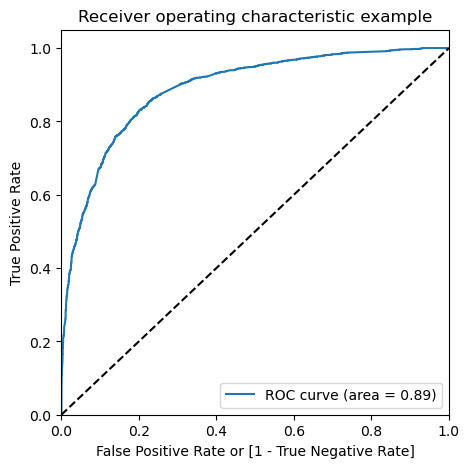

In [101]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Finding Optimal Cutoff Point

In [102]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.192352,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.149334,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.247180,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.879492,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.735792,7987,1,1,1,1,1,1,1,1,1,0,0


In [103]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.600063  0.973426  0.366197
0.2   0.2  0.760353  0.914146  0.664020
0.3   0.3  0.804755  0.850368  0.776184
0.4   0.4  0.814990  0.780867  0.836364
0.5   0.5  0.819399  0.713410  0.885787
0.6   0.6  0.803181  0.608340  0.925224
0.7   0.7  0.787120  0.529845  0.948271
0.8   0.8  0.766808  0.441128  0.970807
0.9   0.9  0.726342  0.309485  0.987452


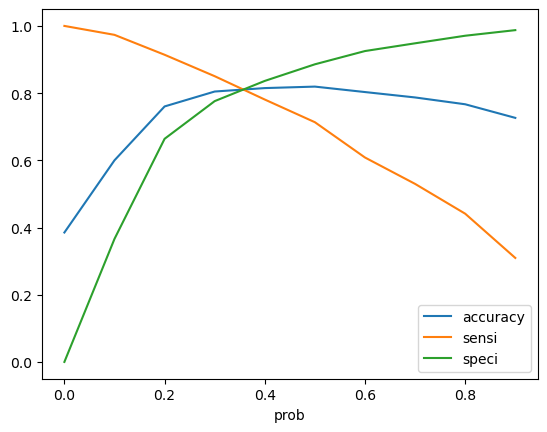

In [104]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [105]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.192352,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.149334,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.247180,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.879492,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.735792,7987,1,1,1,1,1,1,1,1,1,0,0,1


# Assigning Lead Score to the Training data

In [106]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.192352,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.149334,1012,0,1,1,0,0,0,0,0,0,0,0,0,15
2,0,0.247180,9226,0,1,1,1,0,0,0,0,0,0,0,0,25
3,1,0.879492,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.735792,7987,1,1,1,1,1,1,1,1,1,0,0,1,74


# Model Evaluation

In [107]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8104235553456148


In [108]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3129,  776],
       [ 428, 2018]])

In [109]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [110]:
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive rate : ",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print("Negative Predictive Value : ",TN / float(TN+ FN))

Sensitivity :  0.8250204415372036
Specificity : 0.8012804097311139
False Positive rate :  0.19871959026888605
Positive Predictive Value : 0.7222619899785254
Negative Predictive Value :  0.8796738824852404


# Precision and Recall

In [111]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3459,  446],
       [ 701, 1745]])

In [112]:
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7964399817434962


In [113]:
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7134096484055601


In [114]:
from sklearn.metrics import precision_score, recall_score
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision : 0.7964399817434962
Recall : 0.7134096484055601


In [115]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [116]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

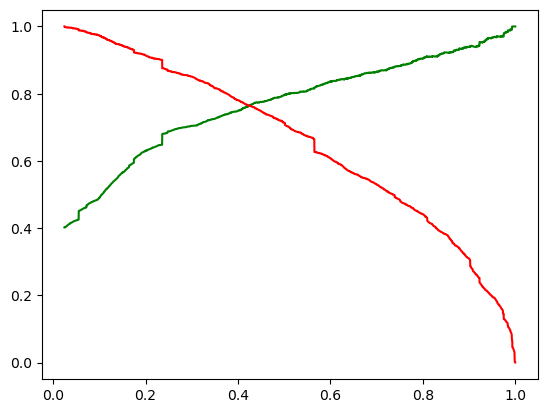

In [117]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Scaling the test data

In [118]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [119]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0,0,-0.600595,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1490,0,0,1.887326,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7936,0,0,-0.752879,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4216,0,0,-0.888650,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3830,0,0,-0.587751,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [120]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.126254
1490    0.969543
7936    0.108892
4216    0.863567
3830    0.129507
1800    0.636127
6507    0.368497
4821    0.297493
4223    0.922567
4714    0.247180
dtype: float64

In [121]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [122]:
y_pred_1.head()

,0
3271,0.126254
1490,0.969543
7936,0.108892
4216,0.863567
3830,0.129507


In [123]:
y_test_df = pd.DataFrame(y_test)

In [124]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [125]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [126]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [127]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.126254
1,1,1490,0.969543
2,0,7936,0.108892
3,1,4216,0.863567
4,0,3830,0.129507


In [128]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [129]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [130]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.126254
1,1490,1,0.969543
2,7936,0,0.108892
3,4216,1,0.863567
4,3830,0,0.129507


In [131]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.126254,0
1,1490,1,0.969543,1
2,7936,0,0.108892,0
3,4216,1,0.863567,1
4,3830,0,0.129507,0


In [132]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8020565552699229


In [133]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1384,  350],
       [ 189,  800]])

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.8088978766430738
Specificity : 0.798154555940023


## Assigning Lead Score to the Testing data

In [136]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.126254,0,13
1,1490,1,0.969543,1,97
2,7936,0,0.108892,0,11
3,4216,1,0.863567,1,86
4,3830,0,0.129507,0,13


In [137]:
promising_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
promising_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.969543,1,97
3,4216,1,0.863567,1,86
8,4223,1,0.922567,1,92
16,1946,1,0.930133,1,93
21,2461,1,0.993497,1,99
...,...,...,...,...,...
2694,1566,1,0.948398,1,95
2699,6461,1,0.965049,1,97
2703,5741,1,0.918323,1,92
2715,6299,1,0.884650,1,88


In [138]:
print("The Prospect ID of the customers which should be contacted are :")

promising_leads_ids = promising_leads["Prospect ID"].values.reshape(-1)
promising_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4216, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049,
       1518, 4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947,
       4807,  446,  789, 8372, 5805, 3758, 1561,  737, 9034, 6423, 8286,
       7174, 4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297,
       5490, 1995, 6532, 4498, 5797, 8687,  831, 7653, 4149, 6743, 3307,
       3976, 5769, 1051, 1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292,
       6913, 6015, 1481,  785, 3265, 3285, 7433, 2460, 3858, 3810, 2009,
       8106,  373, 3055, 7417, 4179, 8568, 7268, 4353, 6784, 6754, 7236,
       2960, 7753, 3983,  802, 8745, 4717,  505, 8509, 6094, 4992, 7036,
       2680, 7065,  112, 6149, 7157, 3827, 7175, 1675, 6999, 5826, 8492,
       6499, 2481, 3439, 4612, 7129, 4793, 1557, 4837, 2495,  822, 2378,
       5090, 5075, 7699, 5638, 2342, 8077, 2727,  720, 7489, 2961, 1542,
       5656, 2630, 6728, 8205, 6332, 8461, 2427, 5087,  174, 2674, 8065,
       2095, 1568, 8597, 4865, 3535, 4708, 1304, 60

## Final Model

In [139]:
res.params.sort_values(ascending=False)

Do Not Call                                             20.567624
Last Activity_Resubscribed to emails                    10.768747
Last Notable Activity_Resubscribed to emails            10.768747
Lead Source_Welingak Website                             5.843206
Lead Source_Reference                                    3.291952
What is your current occupation_Working Professional     2.641628
Last Activity_Had a Phone Conversation                   1.962404
const                                                    1.112859
Total Time Spent on Website                              1.100653
Lead Source_Olark Chat                                   1.075873
Last Activity_Unsubscribed                               0.674811
Last Activity_SMS Sent                                   0.439186
Last Notable Activity_Unreachable                        0.346099
Last Notable Activity_Email Bounced                      0.209873
Last Notable Activity_SMS Sent                          -0.206096
Last Activ